# Recurrent Neural Network (RNN) Model

In [ ]:
import numpy as np
import pandas as pd
import warnings  
warnings.filterwarnings('ignore') 

In [ ]:
df = pd.read_csv("/content/DEXINUS_edited_TRAIN.csv")
df.head()

,Date,Value
0,02-01-1973,8.02
1,03-01-1973,8.02
2,04-01-1973,8.00
3,05-01-1973,8.01
4,08-01-1973,8.00


In [ ]:
training.describe()

,Value
count,10000.000000
mean,26.322729
std,15.857249
min,7.190000
25%,9.570000
50%,27.400000
75%,43.570000
max,51.960000


In [ ]:
actual_currency_train = training.iloc[:, 1:2].values     # creates a 2D array having observation and feature

In [ ]:
 # feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training2 = sc.fit_transform(actual_currency_train)

We prefer Normalization over Standardization here coz the sigmoid function takes values between 0 and 1,
Hence it would be better to scale our values betn 0 and 1, thus its better to do use MinMaxScaler

In [ ]:
training2.shape

(10000, 1)

In [ ]:
#Getting the input and output values

#The input values must be the stock prices at time t and the output values should be the stock prices at time t+1

X_train = training2[0:9999]  
y_train = training2[1:10000]  # values shifted by 1

In [ ]:
#Reshaping

#We need to convert this 2D (observation and feature)array into a 3D array because it is a time series problem
#So we need to add a time step of 1 because our input is currency value at time t and output is stock price at time t+1 and (t+1) - t = 1, hence 1 is the time step
X_train = np.reshape(X_train, (9999, 1, 1))

# (9999, 1, 1) the 2nd argument is no. of features and 3rd argument is the time step

# Building the RNN using LSTM

In [ ]:
# importing libraries
from keras.models import Sequential  # initialize NN as a sequnce of layers
from keras.layers import Dense  # to add fully connected layers
from keras.layers import LSTM

In [ ]:
#Initializing the RNN
rnn_regressor = Sequential()

Adding input layer and LSTM layer

 -In the add method, we use the class corresponding to the layer we want to add
 
 -In this case we are adding the LSTM layer thus replacing the input layer (Dense class) by the LSTM class

In [ ]:
rnn_regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(1, 1)))

Arguments used -

units = no. of memory units

input_shape=(1, 1) means the 1st element is the time step and the 2nd element is no. of features

In [ ]:
# Adding the output layer
rnn_regressor.add(Dense(units=1))

#units = no. of neurons in output layer, here it is a regressor hence 1


In [ ]:
#Compiling the RNN
rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fitting the RNN to training set
rnn_regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
313/313 [==============================] - 23s 2ms/step - loss: 0.2120
Epoch 2/200
313/313 [==============================] - 1s 2ms/step - loss: 0.1052
Epoch 3/200
313/313 [==============================] - 1s 2ms/step - loss: 0.0860
Epoch 4/200
313/313 [==============================] - 1s 2ms/step - loss: 0.0601
Epoch 5/200
313/313 [==============================] - 1s 2ms/step - loss: 0.0329
Epoch 6/200
313/313 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 7/200
313/313 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 8/200
313/313 [==============================] - 1s 2ms/step - loss: 3.7171e-04
Epoch 9/200
313/313 [==============================] - 1s 2ms/step - loss: 6.8065e-05
Epoch 10/200
313/313 [==============================] - 1s 2ms/step - loss: 4.0909e-05
Epoch 11/200
313/313 [==============================] - 1s 2ms/step - loss: 4.1398e-05
Epoch 12/200
313/313 [==============================] - 1s 2ms/step - loss: 3.9

In [ ]:
# predicting the training results
predicted_currency_train = rnn_regressor.predict(X_train)
predicted_currency_train = sc.inverse_transform(predicted_currency_train)

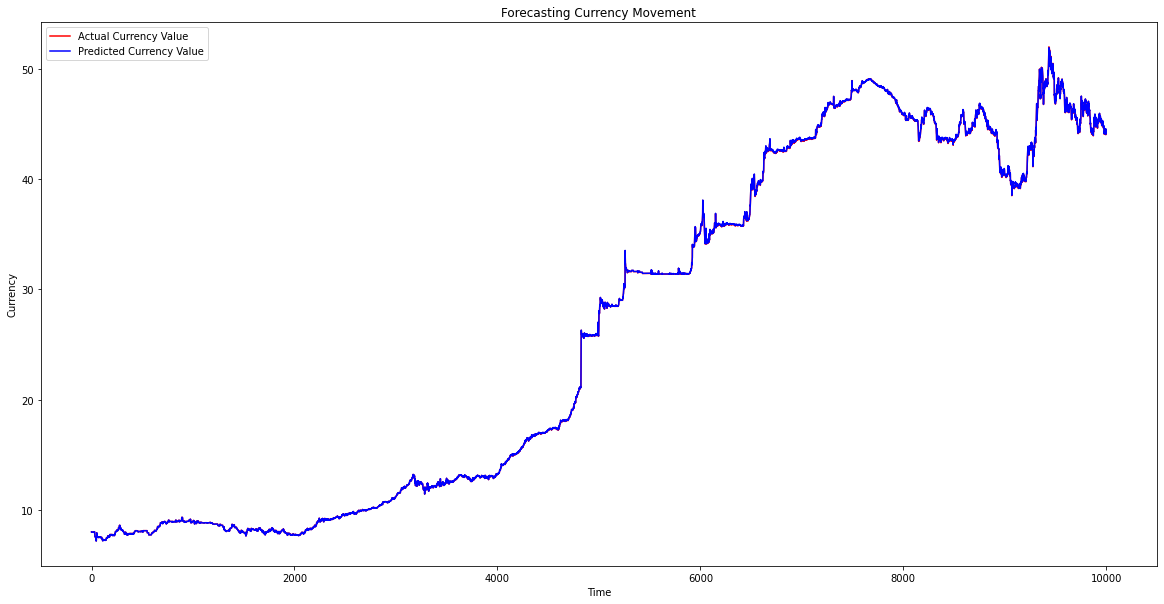

In [ ]:
# visualizing the training results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(actual_currency_train, color = 'red', label='Actual Currency Value')
plt.plot(predicted_currency_train, color = 'blue', label='Predicted Currency Value')
plt.title('Forecasting Currency Movement')
plt.xlabel('Time')
plt.ylabel('Currency')
plt.legend()
plt.show()

In [ ]:
#Making predictions and visualizing results for testing set
testing = pd.read_csv("/content/DEXINUS_edited_TEST.csv")
testing.head()

,Date,Value
0,03-05-2011,44.47
1,04-05-2011,44.35
2,05-05-2011,44.76
3,06-05-2011,44.72
4,09-05-2011,44.68


In [ ]:
testing.describe()

,Value
count,2649.000000
mean,63.970732
std,7.664128
min,44.030000
25%,60.290000
50%,64.900000
75%,69.640000
max,76.950000


Performing similar pre-prcoessing as performed on training set

In [ ]:
actual_currency_test = testing.iloc[:, 1:2].values

In [ ]:
# feature Scaling
inputs = sc.transform(actual_currency_test)

In [ ]:
# reshaping
inputs = np.reshape(inputs, (2649, 1, 1))     # only 2649 observations in testing set

In [ ]:
predict_currency_test = rnn_regressor.predict(inputs)   

In [ ]:
#Performing inverse scaling
predict_currency_test = sc.inverse_transform(predict_currency_test)

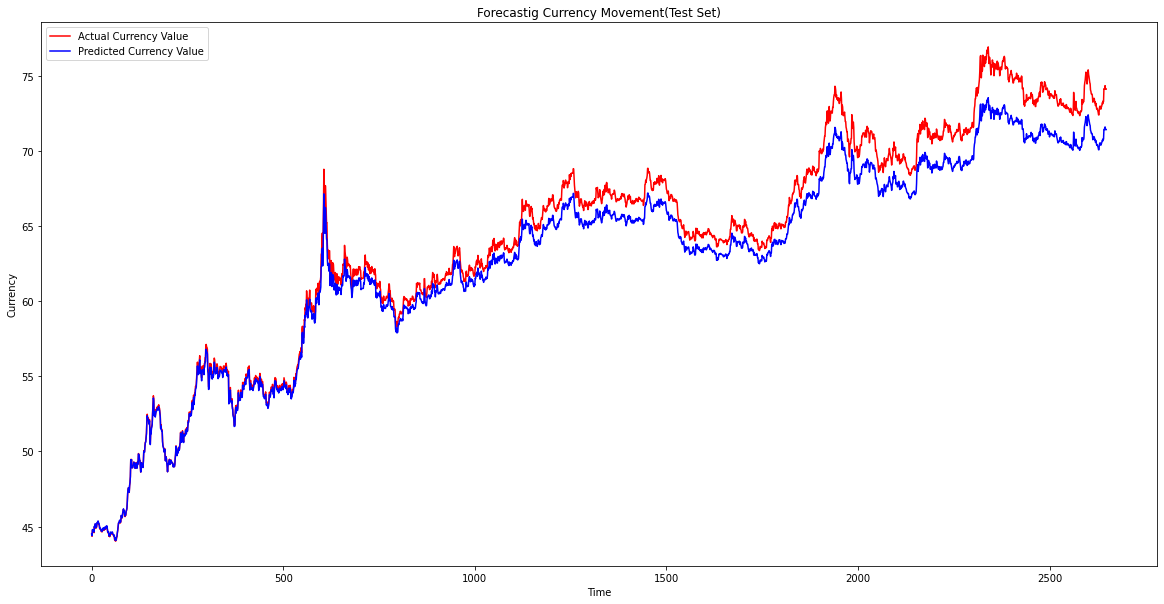

In [ ]:
# visualizing the results for testing
plt.figure(figsize=(20,10))
plt.plot(actual_currency_test, color = 'red', label='Actual Currency Value')
plt.plot(predict_currency_test, color = 'blue', label='Predicted Currency Value')
plt.title('Forecastig Currency Movement(Test Set)')
plt.xlabel('Time')
plt.ylabel('Currency')
plt.legend()
plt.show()

Conclusion

As there is 1 time step between the input and the output, that makes it one time step prediction

It is seen that the predictions are actually following the actual currency value

As amazing as that sounds it would be hard to get such close predictions because in finance, the future variations may not always be dependent on the past, hence its nearly impossible to make long term predictions of stock price


# Evaluating the RNN

In [ ]:
#RMSE value 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual_currency_test, predict_currency_test))
print('The RMSE value is', rmse)


The RMSE value is 1.475216689941364


Generally a good rmse expressed in terms of percentage is around or less than 1%

In [ ]:
print('RMSE in terms of % of the orignal value is', round((rmse/actual_currency_test.mean()*100), 2) , '%')   

RMSE in terms of % of the orignal value is 2.31 %
